# 第３ステージ　高階微分を実現する
`leopard/__init__.py`の中身を`is_simple_core = True`に設定してください

## ステップ２５〜２７
省略

## ステップ28 関数の最適化
### 28.1 ローゼンブロック関数
ローゼンブロック関数は$y=100(x_1-{x_0}^2)^2+(x_0-1)^2$で表される。
<br>

### 28.2 微分を求める
ローゼンブロック関数の$(x_0,x_1)=(0.0,2.0)$における$\frac{\partial y}{\partial x_0}, \frac{\partial y}{\partial x_1}$を求めてみる。

In [1]:
import numpy as np
from leopard import Variable

In [2]:
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0**2) ** 2 + (x0 - 1) ** 2
    return y

In [3]:
x0 = Variable(np.array(0.))
x1 = Variable(np.array(2.))

y = rosenbrock(x0, x1)
y.backward()
x0.grad, x1.grad

(-2.0, 400.0)

### 28.3 勾配降下法の実装
勾配降下法を使って、ローゼンブロック関数の最小値を見つける<br>
勾配降下法の更新式は以下のようになる。これを実装してみる。
$$w_{j+1} = w_j - \eta \frac{\partial z}{\partial w_j}$$

In [4]:
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)

Z = rosenbrock(X, Y)

In [5]:
import matplotlib.pyplot as plt

In [6]:
x0 = Variable(np.array(0.0))
x1 = Variable(np.array(2.0))

x0_list, x1_list = [], []

In [7]:
type(x0.data)

numpy.ndarray

In [8]:
lr = 0.001 # 学習率
iters = 50000 # 繰り返す回数

for i in range(iters):
    x0_list.append(x0.data.copy())
    x1_list.append(x1.data.copy())

    y = rosenbrock(x0, x1)

    x0.cleargrad()
    x1.cleargrad()
    y.backward()

    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad

print(f'{x0.data:.4f}, {x1.data:.4f}')

1.0000, 1.0000


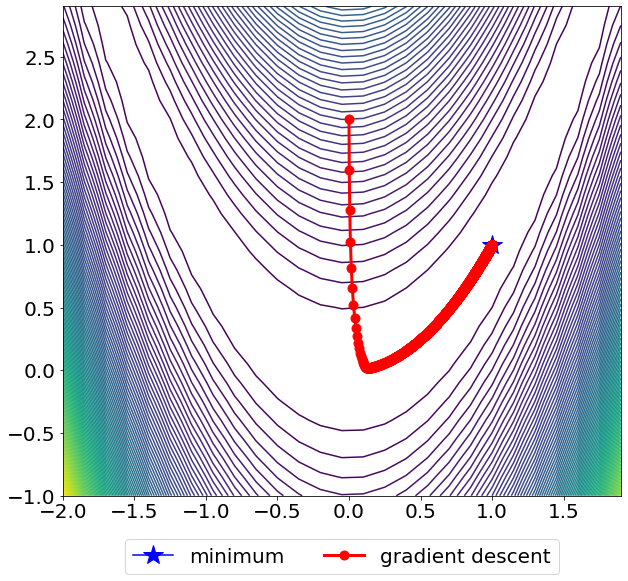

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
ax.contour(X, Y, Z, 100)
ax.plot(1, 1,  marker='*', color='blue', markersize=20, label='minimum')
ax.plot(x0_list, x1_list, marker='o', linewidth=3, markersize=9, color='red', label='gradient descent')
ax.legend(fontsize=20, loc='lower center', bbox_to_anchor=(0.5, -0.18), ncol=2)
ax.tick_params(axis='both', labelsize=20)

## ステップ29 ニュートン法を用いた最適化（手計算）
### 29.1 ニュートン法による最適化の理論
任意の関数$y=f(x)$において、テイラー展開を用いて２次近似すると、
$$f(x) \simeq f(a) + f'(a)(x-a) + \frac{1}{2} f''(a)(x-a)^2$$
となる。２次関数の最小値は、２次の係数が正の時微分が０の場所となるため、
$$
\begin{aligned}
\frac{d}{dx} \Bigl( f(a) + f'(a)(x-a) + \frac{1}{2} f''(a)(x-a)^2 \Bigr) &= 0\\
\Longleftrightarrow f'(a)(x-a) + f''(a)(x-a) &= 0  \\
\Longleftrightarrow x &= a - \frac{f'(a)}{f''(a)}\\
\end{aligned}
$$
と変形できる。勾配降下法と比較すると、以下のようになる。

$$
\begin{aligned}
x \leftarrow x - \eta f'(x) \\
x \leftarrow x - \frac{f'(x)}{f''(x)} 
\end{aligned}
$$


### 29.2 ニュートン法による最適化の実装
$$
\begin{aligned}
y &= x^4 - 2x^2 \\
\frac{\partial y}{\partial x} &= 4x^3-4x \\
\frac{\partial ^2 y}{\partial x^2} &= 12x^2 - 4\\
\end{aligned}
$$
上記の結果を使って、ニュートン法を実装する。

In [10]:
def f(x):
    y = x ** 4 - 2 * x ** 2
    return y


def gx2(x):
    return 12 * x ** 2 - 4

In [11]:
x = Variable(np.array(2.0))
iters = 10000
newton = []
sgd = []
ans = 1.0

In [12]:
#newton
for i in range(iters):
    newton.append(x.data.copy())
    y = f(x)
    
    if abs(ans - x.data) <= 0.001:
        break
    else: 
        x.cleargrad()
        y.backward()

        x.data -= x.grad / gx2(x.data)


In [13]:
#sgd
x = Variable(np.array(2.0))
lr = 0.01

for i in range(iters):
    sgd.append(x.data.copy())
    y = f(x)
    
    if abs(ans - x.data) <= 0.001:
        break
    else:
        x.cleargrad()
        y.backward()
        
        x.data -= lr * x.grad

In [14]:
len(newton), len(sgd)

(5, 71)

In [15]:
x = np.linspace(-2.5, 2.5, 100)
fx = f(x)
result = [newton, sgd]
name = ['newton', 'sgd']

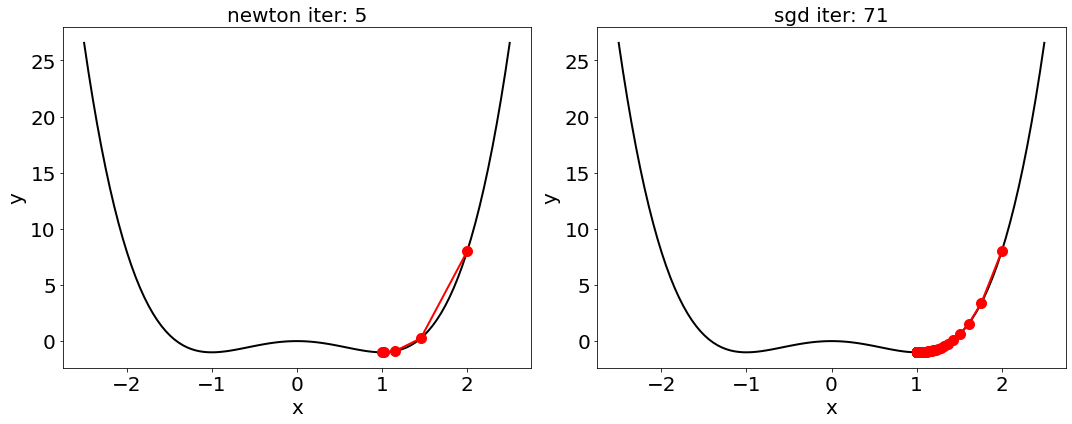

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

for xdata, ax, label in zip(result, axes, name):
    ax.plot(x, fx, linewidth=2, color='black')
    ax.plot(xdata, f(np.array(xdata)), color='red', linewidth=2, markersize=10, marker='o')
    ax.set_title(f'{label} iter: {len(xdata)}', size=20)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_xlabel('x', size=20)
    ax.set_ylabel('y', size=20)

fig.tight_layout()

# stage3-2.ipynbへ続く